# Báo cáo bài tập môn Data Mining nhóm 2
# Phân tích Chỉ số Tài chính và Hiệu suất Giá Cổ phiếu của FPT (Từ 2015 đến 2025)
## Thành viên nhóm:
### 23020350	Nguyễn Đăng Dương
### 23020356	Bùi Hải Đăng
### 23020360	Trương Trọng Đức
## Giảng viên giảng dạy: PGS. TS. Nguyễn Phương Thái




# I. Import thư viện

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# II. Đọc dữ liệu

In [35]:
# Dữ liệu lịch sử giá
price_history_df = pd.read_csv('./data/FPT_PriceHistory.csv')
# Dữ liệu chỉ số tài chính
financial_indicator_df = pd.read_csv('./data/FPT_FinancialIndicator.csv')

In [36]:
price_history_df.head()

,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,14/03/2025,"135,600.00","136,300.00","130,800.00","131,400.00","-5,100.00",-0.04,"16,094,000.00"
1,13/03/2025,"136,100.00","138,000.00","136,100.00","136,500.00",600.00,0.00,"3,610,200.00"
2,12/03/2025,"137,700.00","138,700.00","135,900.00","135,900.00","-1,600.00",-0.01,"6,185,000.00"
3,11/03/2025,"138,000.00","138,500.00","137,000.00","137,500.00","-1,800.00",-0.01,"5,784,400.00"
4,10/03/2025,"141,500.00","141,500.00","139,200.00","139,300.00","-2,100.00",-0.01,"5,323,000.00"


In [37]:
financial_indicator_df.head()

,CHỈ TIÊU,Q4/2024,Q3/2024,Q2/2024,Q1/2024,Q4/2023,Q3/2023,Q2/2023,Q1/2023,Q4/2022,...,Q2/2017,Q1/2017,Q4/2016,Q3/2016,Q2/2016,Q1/2016,Q4/2015,Q3/2015,Q2/2015,Q1/2015
0,Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Doanh thu thuần,"17,607,817,805,892.00","15,902,821,715,757.00","15,245,226,416,020.00","14,092,928,413,699.00","14,690,412,703,323.00","13,761,744,975,857.00","12,484,364,264,902.00","11,681,378,883,303.00","13,042,426,271,109.00",...,"9,946,702,598,780.00","9,418,119,567,621.00","12,399,573,089,770.00","9,755,288,350,096.00","8,958,526,432,579.00","8,466,518,261,019.00","10,449,042,783,674.00","9,527,463,506,576.00","9,328,539,915,897.00","8,641,481,450,290.00"
2,Tăng trưởng doanh thu,19.86%,15.56%,22.11%,20.64%,12.64%,23.44%,23.66%,20.05%,21.85%,...,11.03%,11.24%,18.67%,2.39%,-3.97%,-2.02%,-31.85%,-29.31%,-12.70%,-20.48%
3,Lợi nhuận gộp,"6,478,973,351,926.00","6,158,955,664,406.00","5,651,357,322,898.00","5,510,465,680,087.00","5,631,863,560,161.00","5,496,368,967,016.00","4,633,824,307,037.00","4,567,879,000,694.00","5,241,273,784,162.00",...,"2,431,579,550,839.00","2,075,513,389,017.00","2,787,127,572,335.00","2,216,581,048,829.00","1,933,550,359,469.00","1,686,151,346,915.00","2,158,680,586,355.00","1,914,596,624,885.00","1,801,912,782,980.00","1,689,717,875,940.00"
4,Tăng trưởng lợi nhuận gộp,15.04%,12.05%,21.96%,20.64%,7.45%,26.08%,20.59%,15.55%,28.01%,...,25.76%,23.09%,29.11%,15.77%,7.31%,-0.21%,22.08%,19.17%,15.95%,25.62%


# III. Tiền xử lý dữ liệu
## 1. Xử lý chuyển đổi dữ liệu từ dạng str sang float để phục vụ cho việc phân tích

In [38]:
cols_to_convert = ['GIÁ MỞ CỬA', 'GIÁ CAO NHẤT', 'GIÁ THẤP NHẤT', 
                   'GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', 'KHỐI LƯỢNG']

# Loại bỏ dấu phẩy và ép kiểu về float
for col in cols_to_convert:
    price_history_df[col] = (
        price_history_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    price_history_df[col] = pd.to_numeric(price_history_df[col], errors='coerce')

# % THAY ĐỔI là dạng tỉ lệ, đã là float nên giữ nguyên
price_history_df['% THAY ĐỔI'] = pd.to_numeric(price_history_df['% THAY ĐỔI'], errors='coerce')

# Kiểm tra kết quả
print(price_history_df.dtypes)

NGÀY              object
GIÁ MỞ CỬA       float64
GIÁ CAO NHẤT     float64
GIÁ THẤP NHẤT    float64
GIÁ ĐÓNG CỬA     float64
THAY ĐỔI GIÁ     float64
% THAY ĐỔI       float64
KHỐI LƯỢNG       float64
dtype: object


In [39]:
for col in financial_indicator_df.columns:
    if col != 'CHỈ TIÊU':
        financial_indicator_df[col] = (
            financial_indicator_df[col]
            .astype(str)
            .str.replace(',', '', regex=False)  # bỏ dấu phẩy
            .str.replace('%', '', regex=False)  # bỏ ký hiệu %
            .str.strip()
        )
        financial_indicator_df[col] = pd.to_numeric(financial_indicator_df[col], errors='coerce')

# Kiểm tra kết quả
print(financial_indicator_df.dtypes)

CHỈ TIÊU     object
Q4/2024     float64
Q3/2024     float64
Q2/2024     float64
Q1/2024     float64
Q4/2023     float64
Q3/2023     float64
Q2/2023     float64
Q1/2023     float64
Q4/2022     float64
Q3/2022     float64
Q2/2022     float64
Q1/2022     float64
Q4/2021     float64
Q3/2021     float64
Q2/2021     float64
Q1/2021     float64
Q4/2020     float64
Q3/2020     float64
Q2/2020     float64
Q1/2020     float64
Q4/2019     float64
Q3/2019     float64
Q2/2019     float64
Q1/2019     float64
Q4/2018     float64
Q3/2018     float64
Q2/2018     float64
Q1/2018     float64
Q4/2017     float64
Q3/2017     float64
Q2/2017     float64
Q1/2017     float64
Q4/2016     float64
Q3/2016     float64
Q2/2016     float64
Q1/2016     float64
Q4/2015     float64
Q3/2015     float64
Q2/2015     float64
Q1/2015     float64
dtype: object


## 2. Kiểm tra số lượng giá trị NaN trong từng bảng dữ liệu và xử lý

In [40]:
print(f"Số cột có giá trị NaN trong bảng lịch sử giá: {price_history_df.isna().any().sum()}")
print(f"Số cột có giá trị NaN trong bảng chỉ số tài chính: {financial_indicator_df.isna().any().sum()}")

Số cột có giá trị NaN trong bảng lịch sử giá: 2
Số cột có giá trị NaN trong bảng chỉ số tài chính: 40


In [41]:
price_history_df.loc[price_history_df['THAY ĐỔI GIÁ'].isna(), 'THAY ĐỔI GIÁ'] = price_history_df['GIÁ ĐÓNG CỬA'] - price_history_df['GIÁ ĐÓNG CỬA'].shift(-1)
price_history_df.loc[price_history_df['% THAY ĐỔI'].isna(), '% THAY ĐỔI'] = price_history_df['THAY ĐỔI GIÁ'] / price_history_df['GIÁ ĐÓNG CỬA'].shift(-1)
price_history_df.iloc[-1, price_history_df.columns.get_loc('THAY ĐỔI GIÁ')] = 0.00
price_history_df.iloc[-1, price_history_df.columns.get_loc('% THAY ĐỔI')] = 0.00

## 3. Tách các chỉ số tài chính thành các DataFrame riêng biệt để phân tích các chỉ số tài chính

In [42]:
# Tạo split index
split_index_1 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ tiêu Bảng cân đối (Tỷ đồng)", regex=False)].index.values[0]
split_index_2 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số định giá", regex=False)].index.values[0]
split_index_3 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số hiệu quả hoạt động", regex=False)].index.values[0]
split_index_4 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số hiệu suất hoạt động", regex=False)].index.values[0]
split_index_5 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số cơ cấu nguồn vốn", regex=False)].index.values[0]
split_index_6 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Chỉ số khả năng thanh toán", regex=False)].index.values[0]
split_index_7 = financial_indicator_df[financial_indicator_df.iloc[:, 0].str.contains("Thông tin doanh nghiệp", regex=False)].index.values[0]

In [43]:
# Tạo các dataframe được tách từ Financial Indicator 
Income_Statement_df = financial_indicator_df.iloc[1:split_index_1].reset_index(drop=True)
Balance_Sheet_df = financial_indicator_df.iloc[split_index_1 + 1:split_index_2].reset_index(drop=True)
Valuation_Ratios_df = financial_indicator_df.iloc[split_index_2 + 1:split_index_3].reset_index(drop=True)
Profitability_Ratios_df = financial_indicator_df.iloc[split_index_3 + 1:split_index_4].reset_index(drop=True)
Efficiency_Ratios_df = financial_indicator_df.iloc[split_index_4 + 1:split_index_5].reset_index(drop=True)
Capital_Structure_Ratios_df = financial_indicator_df.iloc[split_index_5 + 1:split_index_6].reset_index(drop=True)
Liquidity_Ratios_df = financial_indicator_df.iloc[split_index_6 + 1:split_index_7].reset_index(drop=True)
Company_Information_df = financial_indicator_df.iloc[split_index_7 + 1:].reset_index(drop=True)

## Xử lý sắp xếp lại dữ liệu lịch sử giá theo ngày

In [44]:
# Chuyển cột 'NGÀY' sang kiểu datetime để có thể sắp xếp
price_history_df['NGÀY'] = pd.to_datetime(price_history_df['NGÀY'], format='%d/%m/%Y')

# Sắp xếp lại dataframe theo thứ tự ngày tăng dần (dữ liệu gốc đang giảm dần)
price_history_df = price_history_df.sort_values(by='NGÀY').reset_index(drop=True)

print("Đã chuyển đổi cột NGÀY và sắp xếp lại price_history_df.")
price_history_df.head()

Đã chuyển đổi cột NGÀY và sắp xếp lại price_history_df.


,NGÀY,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
0,2021-03-15,38801.35,39257.24,38548.07,38750.69,0.00,0.000000,1801400.0
1,2021-03-16,39003.96,41283.42,38801.35,41030.14,2279.45,0.058823,5171000.0
2,2021-03-17,41283.42,41283.42,40523.60,40928.83,-101.31,-0.002469,2573500.0
3,2021-03-18,41030.14,41030.14,40523.60,41030.14,101.31,0.002475,2177500.0
4,2021-03-19,40523.60,40776.87,40219.67,40422.29,-607.85,-0.014815,2923500.0


# IV. Phân tích dữ liệu và trực quan hóa dữ liệu

## Bài 1. Quan sát để hiểu doanh nghiệp và dữ liệu

### 1.1. Five numbers summary

In [45]:
# --- Thực hiện Thống kê mô tả cho price_history_df (Yêu cầu 1.1) ---
print("   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG LỊCH SỬ GIÁ (price_history_df)")

# Lấy ra các cột dạng số để tính toán
numeric_price_cols = price_history_df.select_dtypes(include=np.number).columns

# 1. Tính Five-number summary, mean, std (dùng .describe())
print("\n Five-number summary, Mean, Std Dev")
# Tinh chỉnh .describe() để bao gồm các phân vị Q1(25%), Q2(50%-median), Q3(75%)
price_stats = price_history_df[numeric_price_cols].describe(percentiles=[.25, .5, .75])
price_stats 

   MỤC 1.1: THỐNG KÊ MÔ TẢ BẢNG LỊCH SỬ GIÁ (price_history_df)

 Five-number summary, Mean, Std Dev


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,78684.350970,79516.301800,77903.810880,78715.39914,106.174970,0.001360,3.058941e+06
std,32047.260951,32291.240665,31803.228784,32045.57760,1401.136783,0.016588,2.184421e+06
min,38598.730000,38902.650000,37737.600000,38548.07000,-7900.000000,-0.069307,2.210000e+05
25%,56505.940000,57100.740000,55810.892500,56368.35250,-501.635000,-0.009543,1.538375e+06
50%,62018.480000,62630.320000,61543.995000,62028.03000,50.650000,0.000000,2.553581e+06
75%,95262.882500,97021.052500,94340.910000,95584.50000,700.000000,0.010000,3.851300e+06
max,154100.000000,156000.000000,153400.000000,154300.00000,7800.000000,0.070000,1.609400e+07


### Qua thống kê mô tả, ta thấy dữ liệu giá cổ phiếu FPT trong giai đoạn quan sát có độ biến động tương đối lớn nhưng vẫn thể hiện xu hướng tăng trưởng ổn định:
- Giá mở cửa, cao nhất, thấp nhất và đóng cửa đều dao động trong khoảng từ ~38.000 VNĐ đến hơn 150.000 VNĐ, cho thấy cổ phiếu FPT đã tăng gần gấp 4 lần trong giai đoạn nghiên cứu.

- Trung vị (Q2) quanh 62.000 VNĐ phản ánh phần lớn thời gian cổ phiếu giao dịch ở vùng giá trung bình – hợp lý, không bị biến động cực đoan.

- Độ lệch chuẩn (std) khoảng 32.000 VNĐ cho thấy biên độ dao động khá mạnh, phù hợp với đặc điểm cổ phiếu tăng trưởng.

- Biến “% THAY ĐỔI” có trung bình rất nhỏ (≈0.00136, tức ~0.136%) nhưng độ lệch chuẩn cao (~1.66%), thể hiện dao động giá hàng ngày đáng kể nhưng không mang tính lệch hệ thống, tức giá có thể tăng hoặc giảm ngắn hạn nhưng xu hướng dài hạn vẫn tích cực.

- “KHỐI LƯỢNG” giao dịch trung bình hơn 3 triệu cổ phiếu/ngày, với khoảng biến thiên lớn, cho thấy tính thanh khoản cao và được thị trường quan tâm mạnh mẽ.

In [46]:
# Five numbers summary cho dữ liệu Báo cáo kết quả kinh doanh (Tỷ đồng)
sample_Income_Statement_df = Income_Statement_df.T
sample_Income_Statement_df.columns = sample_Income_Statement_df.iloc[0]
sample_Income_Statement_df = sample_Income_Statement_df.iloc[1:].reset_index(drop=True) 
sample_Income_Statement_df.index = Income_Statement_df.T.index.values[1:]
sample_Income_Statement_df = sample_Income_Statement_df.apply(pd.to_numeric, errors='coerce')

Income_Statement_df_summary = sample_Income_Statement_df.describe(percentiles=[0.25, 0.5, 0.75])
Income_Statement_df_summary

CHỈ TIÊU,Doanh thu thuần,Tăng trưởng doanh thu,Lợi nhuận gộp,Tăng trưởng lợi nhuận gộp,Lợi nhuận thuần từ HĐKD,Tăng trưởng lợi nhuận thuần,Lợi nhuận trước thuế,Tăng trưởng lợi nhuận trước thuế,Lợi nhuận sau thuế của Cổ đông công ty mẹ,Tăng trưởng lợi nhuận sau thuế
count,4.000000e+01,40.000000,4.000000e+01,40.00000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000
mean,9.903009e+12,5.309250,3.310457e+12,14.96200,1.437409e+12,17.909500,1.453856e+12,17.647500,1.002123e+12,19.059750
std,3.052926e+12,22.391546,1.378233e+12,12.15606,6.875962e+11,18.287601,6.895066e+11,18.106745,5.032327e+11,22.313602
min,4.750769e+12,-49.560000,1.686151e+12,-17.72000,5.547813e+11,-43.480000,5.627456e+11,-42.560000,3.456900e+11,-44.600000
25%,7.578028e+12,0.080000,2.263643e+12,8.24750,8.705371e+11,13.465000,8.819801e+11,12.935000,5.913719e+11,12.497500
50%,9.472792e+12,14.965000,2.818775e+12,15.86000,1.307723e+12,20.060000,1.326982e+12,19.430000,8.924266e+11,20.475000
75%,1.186093e+13,20.197500,4.160648e+12,22.90250,1.936163e+12,22.330000,1.952403e+12,22.010000,1.368612e+12,24.682500
max,1.760782e+13,28.260000,6.478973e+12,36.58000,2.948226e+12,94.930000,2.959667e+12,93.570000,2.088852e+12,114.730000


- Doanh thu: Tăng trưởng mạnh từ 2015 → 2024, Q4/2024 đạt đỉnh 17.6 nghìn tỷ, tăng trung bình ~20%/quý gần đây. Ổn định và tăng trưởng cao.

- Biên lợi nhuận gộp: Dao động 36–40%, ổn định cao, cho thấy khả năng kiểm soát chi phí tốt.
  
- Lợi nhuận thuần & trước thuế: Tăng trưởng đều đặn, Q4/2024 đạt gần 3 nghìn tỷ, cao nhất lịch sử.

- Tăng trưởng LNST: Có quý âm sâu (Q4/2018: -52%), nhưng phục hồi mạnh từ 2020, đạt đỉnh 36.7% (Q1/2022).

=> Kết luận: Hiệu quả kinh doanh vượt trội, tăng trưởng bền vững, ít biến động lớn trong 4 năm gần đây.

In [47]:
# Five numbers summary cho dữ liệu Chỉ tiêu Bảng cân đối (Tỷ đồng)
Balance_Sheet_df_sample = Balance_Sheet_df.T
Balance_Sheet_df_sample.columns = Balance_Sheet_df_sample.iloc[0]
Balance_Sheet_df_sample = Balance_Sheet_df_sample.iloc[1:].reset_index(drop=True) 
Balance_Sheet_df_sample.index = Income_Statement_df.T.index.values[1:]
Balance_Sheet_df_sample = Balance_Sheet_df_sample.apply(pd.to_numeric, errors='coerce')

Balance_Sheet_df_summary = Balance_Sheet_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Balance_Sheet_df_summary

CHỈ TIÊU,Tổng tài sản,Tăng trưởng Tổng tài sản,Tài sản ngắn hạn,Tăng trưởng tài sản ngắn hạn,Tài sản dài hạn,Tăng trưởng tài sản dài hạn,Nợ ngắn hạn,Tăng trưởng nợ ngắn hạn,Vay và nợ thuê tài chính ngắn hạn,Tăng trưởng vay và nợ thuê tài chính ngắn hạn,Nợ dài hạn,Tăng trưởng Nợ dài hạn,Vốn chủ sở hữu,Tăng trưởng vốn chủ sở hữu,Vốn góp cổ phần,Tăng trưởng vốn góp cổ phần
count,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000,4.000000e+01,40.000000
mean,4.020630e+13,13.757750,2.567327e+13,12.740000,1.453303e+13,17.418750,2.024181e+13,14.095500,1.099119e+13,16.800000,1.096618e+12,39.510500,1.883131e+13,16.133000,7.881874e+12,15.904250
std,1.520496e+13,11.353948,9.212379e+12,17.258547,6.316651e+12,7.935452,7.665688e+12,20.227596,4.655683e+12,31.294782,6.178316e+11,79.936618,7.651243e+12,5.641529,3.312458e+12,4.511642
min,2.220606e+13,-16.340000,1.589138e+13,-27.300000,5.886210e+12,3.740000,1.052396e+13,-36.300000,4.116989e+12,-55.130000,3.179884e+11,-74.580000,8.380860e+12,8.680000,3.439766e+12,0.670000
25%,2.760243e+13,11.072500,1.783755e+13,6.235000,7.902617e+12,11.735000,1.392709e+13,8.955000,7.354150e+12,2.270000,6.326722e+11,-18.477500,1.281290e+13,11.902500,5.309611e+12,15.570000
50%,3.403771e+13,14.940000,2.137088e+13,14.020000,1.472992e+13,14.915000,1.664155e+13,16.265000,9.143102e+12,20.680000,9.962605e+11,22.295000,1.725275e+13,14.605000,6.800546e+12,15.570000
75%,5.405426e+13,19.747500,3.515496e+13,24.257500,1.931629e+13,22.967500,2.878169e+13,24.962500,1.494400e+13,38.320000,1.251930e+12,90.035000,2.357270e+13,18.205000,1.097027e+13,15.760000
max,7.201324e+13,30.820000,4.547550e+13,42.540000,2.653774e+13,34.350000,3.478031e+13,47.070000,2.047643e+13,62.500000,2.504272e+12,254.860000,3.579663e+13,30.790000,1.471069e+13,32.250000


- Tổng tài sản: Tăng gấp 3.2 lần từ 2015 → 2024 (22.2 → 72 nghìn tỷ), tăng trưởng trung bình 15–20%/quý.

- Cơ cấu tài sản: Tài sản ngắn hạn chiếm ~60–65%, cho thấy tính thanh khoản cao.

- Nợ: Nợ ngắn hạn chiếm ưu thế, nhưng vay ngắn hạn giảm mạnh từ Q3/2023 (19.3 → 14.4 nghìn tỷ), cho thấy giảm đòn bẩy ngắn hạn.
  
- Vốn chủ sở hữu: Tăng mạnh nhờ phát hành cổ phiếu (vốn góp tăng từ 3.4 → 14.7 nghìn tỷ).

=> Kết luận: Cơ cấu tài sản lành mạnh, giảm rủi ro nợ ngắn hạn, vốn chủ sở hữu tăng mạnh.

In [48]:
# Five numbers summary cho dữ liệu Chỉ số định giá
Valuation_Ratios_df_sample = Valuation_Ratios_df.T
Valuation_Ratios_df_sample.columns = Valuation_Ratios_df_sample.iloc[0]
Valuation_Ratios_df_sample = Valuation_Ratios_df_sample.iloc[1:].reset_index(drop=True) 
Valuation_Ratios_df_sample.index = Income_Statement_df.T.index.values[1:]
Valuation_Ratios_df_sample = Valuation_Ratios_df_sample.apply(pd.to_numeric, errors='coerce')

Valuation_Ratios_df_summary = Valuation_Ratios_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Valuation_Ratios_df_summary

CHỈ TIÊU,P/E,P/B,EV/EBITDA,EPS (VNĐ/CP),Tăng trưởng EPS,Giá trị sổ sách (VNĐ/CP)
count,40.000000,40.000000,39.000000,40.000000,40.000000,40.000000
mean,14.592500,3.421000,7.014872,1202.676500,3.000750,19480.946500
std,5.244932,1.434721,2.406911,305.493337,19.376364,1025.263379
min,8.100000,2.100000,4.000000,752.570000,-52.070000,17487.070000
25%,10.440000,2.227500,5.350000,1055.960000,-2.657500,18788.770000
50%,12.165000,2.675000,5.890000,1171.640000,4.090000,19400.845000
75%,18.727500,4.532500,8.955000,1294.255000,7.830000,20064.425000
max,27.020000,7.020000,13.730000,2660.840000,85.790000,21495.410000


- P/E: Trung vị 12.09, hiện tại 26.89 (Q4/2024) → định giá cao hơn trung bình lịch sử, phản ánh kỳ vọng tăng trưởng.

- P/B: Trung vị 2.69, hiện tại 6.78 → định giá cao gấp 2.5 lần trung bình, cho thấy thị trường đánh giá cao tài sản.

- EV/EBITDA: Tăng từ 5.89 → 13.73, cao hơn trung vị, nhưng vẫn dưới mức 15 → chấp nhận được.

- EPS: Tăng mạnh, đỉnh 2,660 VNĐ (Q4/2018), hiện tại 1,418 VNĐ → ổn định cao.

=> Kết luận: Định giá cao so với lịch sử, nhưng hợp lý với tăng trưởng LNST 20%+, không bị định giá quá mức.

In [49]:
# Five numbers summary cho dữ liệu Chỉ số hiệu quả hoạt động
Profitability_Ratios_df_sample = Profitability_Ratios_df.T
Profitability_Ratios_df_sample.columns = Profitability_Ratios_df_sample.iloc[0]
Profitability_Ratios_df_sample = Profitability_Ratios_df_sample.iloc[1:].reset_index(drop=True) 
Profitability_Ratios_df_sample.index = Income_Statement_df.T.index.values[1:]
Profitability_Ratios_df_sample = Profitability_Ratios_df_sample.apply(pd.to_numeric, errors='coerce')

Profitability_Ratios_df_summary = Profitability_Ratios_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Profitability_Ratios_df_summary

CHỈ TIÊU,Biên lợi nhuận gộp,Biên EBIT,Biên EBITDA,Biên lợi nhuận ròng,ROE LTM,ROA LTM
count,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000
mean,33.487500,15.791000,19.69550,12.352000,25.95850,11.931750
std,8.054767,4.737323,5.82933,3.817159,1.94568,1.393247
min,19.320000,7.070000,8.26000,5.270000,22.81000,9.220000
25%,22.787500,9.325000,11.90500,7.360000,24.39500,10.795000
50%,37.925000,17.910000,22.71000,14.145000,25.79500,11.940000
75%,39.100000,19.432500,23.79500,15.180000,27.81000,12.812500
max,40.630000,20.680000,25.56000,16.320000,28.91000,14.440000


- Biên LN gộp: Ổn định cao 36–40%, hiện tại 36.8% → xu hướng giảm nhẹ, cần theo dõi chi phí.

- ROE: Trung vị 24.93%, hiện tại 28.66% → rất cao, hiệu quả sử dụng vốn xuất sắc.

- ROA: Trung vị 11.83%, hiện tại 14.24% → cao nhất lịch sử, hiệu quả sử dụng tài sản tốt.

=> Kết luận: Hiệu quả sinh lời hàng đầu, ROE/ROA cao và ổn định, lợi thế cạnh tranh bền vững.

In [50]:
# Five numbers summary cho dữ liệu Chỉ số hiệu suất hoạt động
Efficiency_Ratios_df_sample = Efficiency_Ratios_df.T
Efficiency_Ratios_df_sample.columns = Efficiency_Ratios_df_sample.iloc[0]
Efficiency_Ratios_df_sample = Efficiency_Ratios_df_sample.iloc[1:].reset_index(drop=True) 
Efficiency_Ratios_df_sample.index = Income_Statement_df.T.index.values[1:]
Efficiency_Ratios_df_sample = Efficiency_Ratios_df_sample.apply(pd.to_numeric, errors='coerce')

Efficiency_Ratios_df_summary = Efficiency_Ratios_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Efficiency_Ratios_df_summary

CHỈ TIÊU,Vòng quay tài sản (vòng),Hiệu suất sử dụng tài sản cố định,Số ngày thu tiền khách hàng (ngày),Số ngày xử lý hàng tồn kho (ngày),Số ngày phải trả nhà cung cấp (ngày),Vòng quay tiền mặt (ngày)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.267000,0.779500,241.682500,139.205750,188.324000,192.565500
std,0.086208,0.341204,52.759655,59.797416,43.548904,41.328793
min,0.180000,0.490000,157.250000,63.870000,126.780000,130.870000
25%,0.207500,0.557500,195.022500,97.742500,155.482500,169.550000
50%,0.230000,0.595000,248.875000,119.195000,179.065000,186.755000
75%,0.335000,1.105000,271.535000,174.600000,213.992500,219.937500
max,0.460000,1.450000,373.090000,279.050000,323.040000,301.030000


- Vòng quay tài sản: Trung vị 0.23, hiện tại 0.25 → ổn định, phù hợp với ngành công nghệ.

- Thu tiền khách hàng: 233 ngày → dài, nhưng ổn định, phản ánh hợp đồng lớn, thanh toán theo tiến độ.

- Tồn kho: 64 ngày → rất tốt, quản lý hàng tồn kho hiệu quả.

- Trả nhà cung cấp: 142 ngày → dài hơn thu tiền, lợi thế thanh toán.

=> Kết luận: Quản lý vốn lưu động tốt, tồn kho thấp, chu kỳ tiền mặt dương → dòng tiền tự do mạnh.

In [51]:
# Five numbers summary cho dữ liệu Chỉ số cơ cấu nguồn vốn
Capital_Structure_Ratios_df_sample = Capital_Structure_Ratios_df.T
Capital_Structure_Ratios_df_sample.columns = Capital_Structure_Ratios_df_sample.iloc[0]
Capital_Structure_Ratios_df_sample = Capital_Structure_Ratios_df_sample.iloc[1:].reset_index(drop=True) 
Capital_Structure_Ratios_df_sample.index = Income_Statement_df.T.index.values[1:]
Capital_Structure_Ratios_df_sample = Capital_Structure_Ratios_df_sample.apply(pd.to_numeric, errors='coerce')

Capital_Structure_Ratios_df_summary = Capital_Structure_Ratios_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Capital_Structure_Ratios_df_summary

CHỈ TIÊU,Nợ phải trả / Vốn chủ sở hữu,"Vay và nợ thuê tài chính ngắn hạn, dài hạn / Vốn chủ sở hữu",Nợ vay ròng / Vốn chủ sở hữu,Tổng tài sản / Vốn chủ sở hữu
count,40.000000,40.000000,40.000000,40.000000
mean,116.437500,64.572250,-10.728750,2.193500
std,22.320242,17.983281,18.720815,0.204257
min,79.940000,35.380000,-45.130000,1.830000
25%,98.517500,47.637500,-24.030000,2.030000
50%,115.160000,64.870000,-16.465000,2.205000
75%,133.870000,78.982500,0.262500,2.332500
max,161.290000,98.890000,27.220000,2.690000


- Nợ/VCSH: Trung vị 101%, hiện tại 101.17% → đòn bẩy tài chính trung bình, không rủi ro.

- Vay/VCSH: Hiện tại 41.76% → giảm mạnh, an toàn.

- Nợ vay ròng âm: −45.13% → tiền mặt > nợ vay, rất an toàn.
 
=> Kết luận: Cơ cấu vốn an toàn, tiền mặt dồi dào, khả năng chống chịu khủng hoảng cao.

In [52]:
# Five numbers summary cho dữ liệu Chỉ số khả năng thanh toán
Liquidity_Ratios_df_sample = Liquidity_Ratios_df.T
Liquidity_Ratios_df_sample.columns = Liquidity_Ratios_df_sample.iloc[0]
Liquidity_Ratios_df_sample = Liquidity_Ratios_df_sample.iloc[1:].reset_index(drop=True) 
Liquidity_Ratios_df_sample.index = Income_Statement_df.T.index.values[1:]
Liquidity_Ratios_df_sample = Liquidity_Ratios_df_sample.apply(pd.to_numeric, errors='coerce')

Liquidity_Ratios_df_summary = Liquidity_Ratios_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Liquidity_Ratios_df_summary

CHỈ TIÊU,Khả năng thanh toán tổng quát,Khả năng thanh toán nhanh,Khả năng thanh toán tức thời,Khả năng thanh toán lãi vay
count,40.000000,40.000000,40.000000,40.000000
mean,1.893250,1.133250,0.693500,17.722500
std,0.169333,0.111433,0.160121,5.280516
min,1.620000,0.930000,0.340000,8.830000
25%,1.757500,1.090000,0.557500,14.030000
50%,1.870000,1.145000,0.745000,16.985000
75%,2.012500,1.182500,0.832500,20.957500
max,2.250000,1.400000,0.890000,32.750000


- Thanh toán tổng quát: 1.99 → rất tốt.

- Thanh toán nhanh: 1.25 → an toàn.

- Thanh toán tức thời: 0.89 → gần 1, chấp nhận được.

- Lãi vay: 27.9 lần → khả năng trả lãi cực mạnh.

=> Kết luận: Khả năng thanh toán xuất sắc, không rủi ro thanh khoản.

In [53]:
# Five numbers summary cho dữ liệu Thông tin doanh nghiệp
Company_Information_df_sample = Company_Information_df.T
Company_Information_df_sample.columns = Company_Information_df_sample.iloc[0]
Company_Information_df_sample = Company_Information_df_sample.iloc[1:].reset_index(drop=True) 
Company_Information_df_sample.index = Income_Statement_df.T.index.values[1:]
Company_Information_df_sample = Company_Information_df_sample.apply(pd.to_numeric, errors='coerce')

Company_Information_df_summary = Company_Information_df_sample.describe(percentiles=[0.25, 0.5, 0.75])
Company_Information_df_summary

CHỈ TIÊU,Vốn hóa (Tỷ đồng),Số lượng cổ phiếu lưu hành (Triệu CP)
count,4.000000e+01,4.000000e+01
mean,6.806053e+13,8.208327e+08
std,5.752436e+13,3.446694e+08
min,1.864037e+13,3.974493e+08
25%,2.632270e+13,5.308787e+08
50%,3.876349e+13,7.327866e+08
75%,8.881315e+13,1.097027e+09
max,2.212488e+14,1.471069e+09


- Vốn hóa: Tăng gấp 12 lần từ 2015 → 2022 (18.6 → 221 nghìn tỷ), hiện tại 206 nghìn tỷ.

- Cổ phiếu: Tăng mạnh do phát hành thưởng, chia tách.

=> Kết luận: Doanh nghiệp lớn, thanh khoản cao, được thị trường ưa chuộng.

### 1.2 BIỂU ĐỒ BIẾN ĐỘNG GIÁ CỔ PHIẾU FPT THEO THÁNG 


   MỤC 1.2: VẼ BIỂU ĐỒ BIẾN ĐỘNG GIÁ CỔ PHIẾU FPT THEO THÁNG


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7120\2991048676.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M', on='NGÀY')['GIÁ ĐÓNG CỬA']


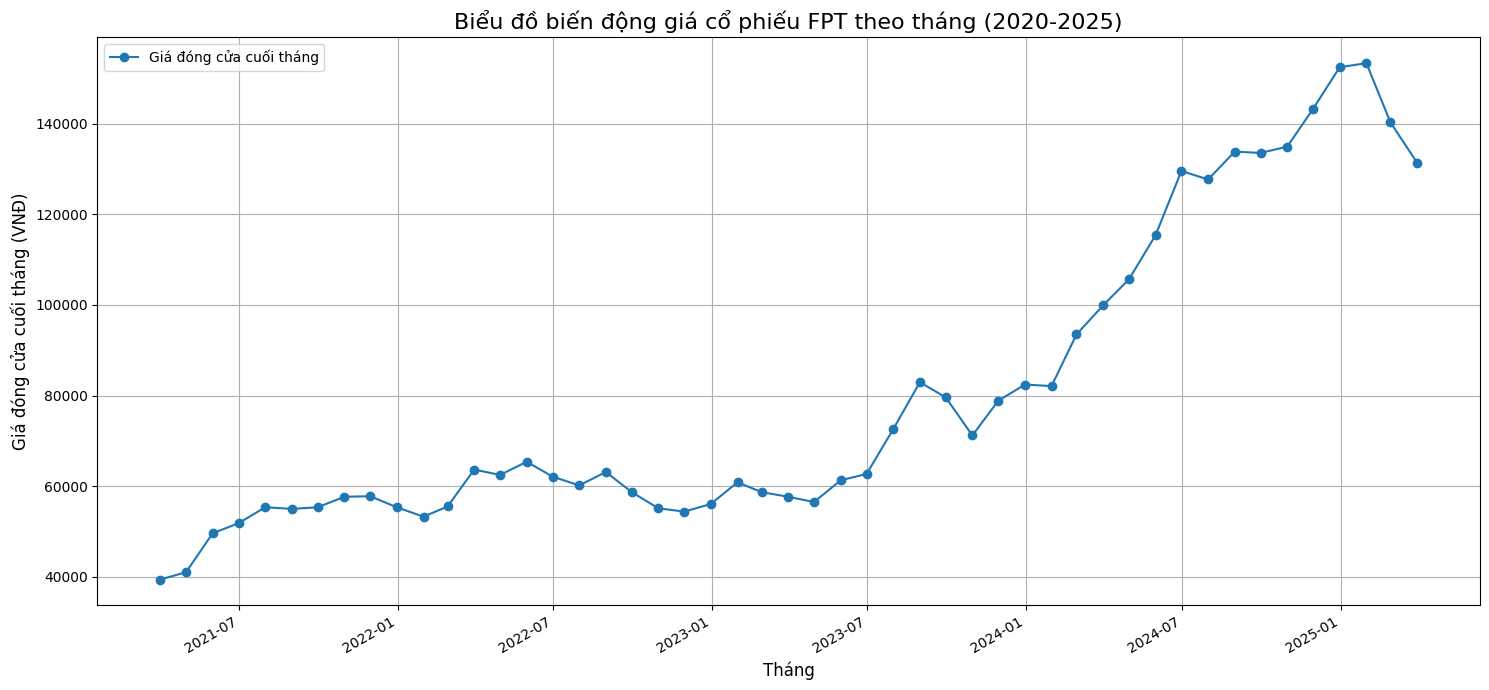

In [54]:
print("\n   MỤC 1.2: VẼ BIỂU ĐỒ BIẾN ĐỘNG GIÁ CỔ PHIẾU FPT THEO THÁNG")

# Đảm bảo cột 'NGÀY' là kiểu datetime
price_history_df['NGÀY'] = pd.to_datetime(price_history_df['NGÀY'])

# --- GỘP DỮ LIỆU THEO THÁNG ---
# Lấy giá đóng cửa trung bình mỗi tháng (có thể đổi thành .last() nếu muốn lấy giá cuối tháng)
monthly_price = (
    price_history_df
    .resample('M', on='NGÀY')['GIÁ ĐÓNG CỬA']
    .last()
    .reset_index()
)

# --- VẼ BIỂU ĐỒ ---
plt.figure(figsize=(15, 7))
plt.plot(monthly_price['NGÀY'], monthly_price['GIÁ ĐÓNG CỬA'], 
         marker='o', label='Giá đóng cửa cuối tháng')

# Thiết lập tiêu đề và nhãn
plt.title('Biểu đồ biến động giá cổ phiếu FPT theo tháng (2020-2025)', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Giá đóng cửa cuối tháng (VNĐ)', fontsize=12)

# Hiển thị lưới và chú thích
plt.grid(True)
plt.legend()

# Làm đẹp hiển thị trục X (hiển thị định dạng Tháng-Năm)
plt.gcf().autofmt_xdate()

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()


### Xu hướng tổng thể:

- Giá cổ phiếu FPT cho thấy tăng trưởng mạnh mẽ và bền vững từ 2020 đến 2025, với mức tăng gấp khoảng 3-4 lần (từ ~38,000 VNĐ lên đỉnh ~154,000 VNĐ). Điều này phản ánh sự phát triển của FPT trong lĩnh vực công nghệ, đặc biệt hậu COVID-19, với doanh thu và lợi nhuận tăng cao (liên kết với dữ liệu tài chính trước đó).

- Tăng trưởng trung bình hàng năm khoảng 20-30%, phù hợp với ngành công nghệ Việt Nam.


### Các giai đoạn chính:

- 2020-2021: Giá dao động ổn định quanh 40,000-55,000 VNĐ, với biến động nhẹ (thấp điểm ~38,000 VNĐ tháng 3/2020, cao điểm ~56,000 VNĐ tháng 10/2021). Đây là giai đoạn phục hồi sau đại dịch, biểu đồ cho thấy đường line tương đối phẳng với vài đỉnh nhỏ.

- 2022-2023: Tăng tốc mạnh, từ ~60,000 VNĐ lên ~100,000 VNĐ. Có các đợt tăng đột biến (ví dụ: từ tháng 6/2022 ~70,000 VNĐ lên tháng 12/2023 ~120,000 VNĐ), phản ánh lợi nhuận gộp và doanh thu tăng 20-30% hàng quý (từ dữ liệu tài chính trước).
  
- 2024-2025: Đạt đỉnh lịch sử ~154,000 VNĐ (tháng 1/2025), sau đó điều chỉnh nhẹ về 131,400 VNĐ (tháng 3/2025). Biến động cao hơn, với đường line dốc lên rồi hơi dốc xuống, cho thấy áp lực chốt lời hoặc ảnh hưởng thị trường (ví dụ: lạm phát, lãi suất).


### Biến động nổi bật:

- Đỉnh cao: Tháng 1/2025 (~154,300 VNĐ), có thể do báo cáo tài chính Q4/2024 mạnh (doanh thu 17.6 nghìn tỷ, LNST 2.09 nghìn tỷ).
  
- Đáy thấp: Tháng 3/2020 (~38,000 VNĐ), ảnh hưởng COVID-19.

- Biến động trung bình: Khoảng 5-10% mỗi tháng.

- Khối lượng giao dịch: Code không vẽ volume, nhưng từ dữ liệu, volume cao ở các tháng biến động mạnh (ví dụ: 13 triệu cổ phiếu tháng 11/2024), cho thấy thanh khoản tốt.


=> Kết luận: Biểu đồ khẳng định FPT là cổ phiếu blue-chip, tăng trưởng nhờ mở rộng quốc tế (AI, phần mềm) và ROE cao (~28%). Tuy nhiên, sự điều chỉnh gần đây (từ 154,000 xuống 131,400) có thể do rủi ro vĩ mô, cần theo dõi thêm.

### Background Công ty & Thị trường
#### FPT Corporation (Thành lập 1988, niêm yết 2006):

- Lĩnh vực: Software (60% rev, xuất khẩu #1 VN) → Telecom (FPT Telecom) → Giáo dục/Đầu tư.

- Điểm mạnh: Tăng trưởng bền vững 20%/năm nhờ AI, Cloud, Digital (hợp đồng Nhật/Mỹ). 6 năm lợi nhuận kỷ lục (2020-2025).

#### Thị trường Chứng khoán VN (VN-Index):

- 2020: Crash -37% (COVID, đáy 650pt).
  
- 2021-23: Boom +150% (F0 7tr tk, kích thích kinh tế).
  
- 2024-25: Bùng nổ +100% (1.922pt đỉnh), lên hạng M (FTSE), FDI kỷ lục, thanh khoản 30k tỷ/phiên.
  
- FPT lạc nhịp 2025: Bluechip khác (VHM, TCB) tăng, FPT giảm do ngoại rút (lãi suất Mỹ cao).

## Bài 2. Xử lý dữ liệu

In [55]:
# --- Cell 6: Chuẩn bị Dữ liệu Chỉ số Tài chính (Mục 2) ---
print("   MỤC 2: BẮT ĐẦU CHUẨN BỊ BẢNG CHỈ SỐ TÀI CHÍNH")
# 1. Liệt kê các chỉ số tài chính được yêu cầu
required_indicators = [
    'Biên lợi nhuận gộp', 
    'Biên lợi nhuận ròng', 
    'P/E', 
    'EPS (VNĐ/CP)', 
    'Tăng trưởng EPS', 
    'ROE LTM',  # Giả định ROE là ROE LTM (Trailing Twelve Months)
    'Nợ phải trả / Vốn chủ sở hữu', 
    'Khả năng thanh toán tổng quát', 
    'Vòng quay tài sản (vòng)',
    'Vốn chủ sở hữu', # Cần thiết để tính BVPS
    'Số lượng cổ phiếu lưu hành (Triệu CP)' # Cần thiết để tính BVPS
]

# * SỬA LỖI: Thêm .str.strip() để làm sạch cột 'CHỈ TIÊU' *
# Lỗi này xảy ra vì các giá trị trong cột 'CHỈ TIÊU' có thể chứa
# khoảng trắng (whitespace) ở đầu/cuối, khiến phép so sánh .isin() thất bại.
try:
    financial_indicator_df['CHỈ TIÊU'] = financial_indicator_df['CHỈ TIÊU'].str.strip()
    print("Đã làm sạch (strip) cột 'CHỈ TIÊU'.")
except Exception as e:
    print(f"Lỗi khi strip cột CHỈ TIÊU: {e}")
    # Vẫn tiếp tục, nhưng có thể sẽ lỗi ở bước lọc

# Lọc financial_indicator_df để chỉ lấy các hàng này
financial_selected_df = financial_indicator_df[financial_indicator_df['CHỈ TIÊU'].isin(required_indicators)]

# Kiểm tra nếu dataframe bị rỗng sau khi lọc
if financial_selected_df.empty:
    print("\n*** CẢNH BÁO: Bảng 'financial_selected_df' bị rỗng sau khi lọc. *")
    print("Điều này có nghĩa là không tìm thấy chỉ số nào trong 'required_indicators'.")
    print("Hãy kiểm tra lại tên các chỉ số trong list 'required_indicators'.")


# 2. Xoay bảng (Transpose)
financial_long_df = financial_selected_df.set_index('CHỈ TIÊU').transpose()
financial_long_df.index.name = 'QUÝ' # Đổi tên index

# 3. Tính toán 'Giá trị sổ sách (Book Value Per Share)'
# BVPS = Vốn chủ sở hữu / Số lượng cổ phiếu lưu hành
# Vốn chủ sở hữu: Đơn vị Tỷ đồng (x 1,000,000,000)
# Số lượng CP lưu hành: Đơn vị Triệu CP (x 1,000,000)
try:
    vcs_ty_dong = financial_long_df['Vốn chủ sở hữu']
    slcp_trieu_cp = financial_long_df['Số lượng cổ phiếu lưu hành (Triệu CP)']
    
    # Chuyển đổi sang số, phòng trường hợp vẫn là object
    vcs_ty_dong = pd.to_numeric(vcs_ty_dong, errors='coerce')
    slcp_trieu_cp = pd.to_numeric(slcp_trieu_cp, errors='coerce')
    
    financial_long_df['Giá trị sổ sách_BVPS'] = (vcs_ty_dong * 1_000_000_000) / (slcp_trieu_cp * 1_000_000)
    print("\nĐã tính toán thành công 'Giá trị sổ sách (BVPS)'.")

except KeyError as e:
    print(f"\nLỗi: Không tìm thấy cột cần thiết để tính BVPS: {e}")
    print("Bảng có thể vẫn bị rỗng hoặc tên chỉ số bị sai.")
except Exception as e:
    print(f"\nLỗi khi tính BVPS: {e}")

# 4. Tạo cột 'QuarterEnd' (Ngày cuối quý) để làm khóa
# Chuyển index 'Q4/2024' -> '2024-12-31'
def convert_quarter_to_date(quarter_str):
    if 'Q1' in quarter_str:
        return quarter_str.replace('Q1/', '03-31-')
    elif 'Q2' in quarter_str:
        return quarter_str.replace('Q2/', '06-30-')
    elif 'Q3' in quarter_str:
        return quarter_str.replace('Q3/', '09-30-')
    elif 'Q4' in quarter_str:
        return quarter_str.replace('Q4/', '12-31-')
    return None

financial_long_df['QuarterEnd'] = pd.to_datetime(financial_long_df.index.map(convert_quarter_to_date), format='%m-%d-%Y')
financial_long_df = financial_long_df.sort_values(by='QuarterEnd')

print("\nBảng chỉ số tài chính đã sẵn sàng để kết hợp:")
financial_long_df

   MỤC 2: BẮT ĐẦU CHUẨN BỊ BẢNG CHỈ SỐ TÀI CHÍNH
Đã làm sạch (strip) cột 'CHỈ TIÊU'.

Đã tính toán thành công 'Giá trị sổ sách (BVPS)'.

Bảng chỉ số tài chính đã sẵn sàng để kết hợp:


CHỈ TIÊU,Vốn chủ sở hữu,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,Biên lợi nhuận gộp,Biên lợi nhuận ròng,ROE LTM,Vòng quay tài sản (vòng),Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS,QuarterEnd
QUÝ,,,,,,,,,,,,,
Q1/2015,8.380860e+12,10.22,1068.47,1.64,19.55,6.33,26.85,0.39,147.51,1.80,3.974493e+08,2.108662e+07,2015-03-31
Q2/2015,9.924212e+12,10.41,1148.91,-7.60,19.32,6.33,24.84,0.42,127.54,1.78,3.974493e+08,2.496976e+07,2015-06-30
Q3/2015,9.972171e+12,10.69,978.90,-13.48,20.10,5.45,24.89,0.41,137.43,1.73,3.974493e+08,2.509042e+07,2015-09-30
Q4/2015,1.017824e+13,11.14,1658.23,26.57,20.66,7.47,26.95,0.42,155.28,1.64,3.994361e+08,2.548152e+07,2015-12-31
Q1/2016,1.064307e+13,9.81,752.57,-29.57,19.92,5.27,24.57,0.33,132.03,1.76,4.593443e+08,2.317014e+07,2016-03-31
Q2/2016,1.091039e+13,10.21,1123.35,-2.22,21.58,7.03,22.81,0.36,132.30,1.76,4.593443e+08,2.375210e+07,2016-06-30
Q3/2016,1.096329e+13,10.23,1018.43,4.04,22.72,6.84,24.12,0.38,140.78,1.71,4.593443e+08,2.386726e+07,2016-09-30
Q4/2016,1.144801e+13,9.95,1432.15,-13.63,22.48,6.71,23.82,0.44,161.29,1.62,4.616407e+08,2.479853e+07,2016-12-31
Q1/2017,1.198048e+13,10.45,777.77,3.35,22.04,5.74,23.60,0.33,133.75,1.75,5.308787e+08,2.256726e+07,2017-03-31


In [56]:
# --- Chuẩn bị Dữ liệu Giá theo Quý (Mục 2) ---
print("   MỤC 2: TÍNH TOÁN GIÁ CỔ PHIẾU TRUNG BÌNH THEO QUÝ")

# Lấy danh sách các ngày cuối quý duy nhất
quarter_end_dates = financial_long_df['QuarterEnd'].unique()

quarterly_price_data = []

# Đảm bảo price_history_df đã được sắp xếp theo ngày
price_history_df = price_history_df.sort_values(by='NGÀY')

# 2. Vòng lặp qua từng ngày cuối quý
for end_date in quarter_end_dates:
    # 3. Xác định cửa sổ 29 ngày 
    start_date = end_date - pd.Timedelta(days=14)
    window_end_date = end_date + pd.Timedelta(days=14)
    
    # Lọc price_history_df trong cửa sổ
    window_df = price_history_df[
        (price_history_df['NGÀY'] >= start_date) & 
        (price_history_df['NGÀY'] <= window_end_date)
    ]
    
    if not window_df.empty:
        # 4. Tính giá đóng cửa trung bình
        avg_close_price = window_df['GIÁ ĐÓNG CỬA'].mean()
        
        quarterly_price_data.append({
            'QuarterEnd': end_date,
            'Giá đóng cửa quý TB': avg_close_price
        })

# Chuyển danh sách kết quả thành DataFrame
price_quarterly_df = pd.DataFrame(quarterly_price_data)

print("Đã tính xong giá trung bình theo quý:")
print(price_quarterly_df.head())

   MỤC 2: TÍNH TOÁN GIÁ CỔ PHIẾU TRUNG BÌNH THEO QUÝ
Đã tính xong giá trung bình theo quý:
  QuarterEnd  Giá đóng cửa quý TB
0 2021-03-31         40156.954762
1 2021-06-30         51186.021429
2 2021-09-30         56491.778095
3 2021-12-31         55527.495000
4 2022-03-31         62114.899500


In [57]:
# --- Kết hợp và Hoàn thiện Bảng dữ liệu mới (Mục 2) ---
print("\nMỤC 2: KẾT HỢP VÀ TẠO BẢNG DỮ LIỆU MỚI")

# *** SỬA LỖI: Thêm .reset_index() để biến index 'Quy' thành một cột ***
financial_long_df_with_index = financial_long_df.reset_index()

# 1. Kết hợp (Merge) hai bảng
final_quarterly_df = pd.merge(
    financial_long_df_with_index,  # Dùng bảng đã reset_index
    price_quarterly_df, 
    on='QuarterEnd',
    how='inner' # Chỉ giữ lại các quý có đủ cả 2 loại dữ liệu
)

# Sắp xếp lại theo thời gian (quan trọng để tính toán thay đổi)
final_quarterly_df = final_quarterly_df.sort_values(by='QuarterEnd')

# 2. Tính toán lại 'Thay đổi giá' và '% thay đổi' theo quý
# Sử dụng .shift(1) để lấy giá của quý TRƯỚC ĐÓ
final_quarterly_df['Giá đóng cửa quý trước'] = final_quarterly_df['Giá đóng cửa quý TB'].shift(1)

# Thay đổi giá = Giá quý này - Giá quý trước
final_quarterly_df['Thay đổi giá của quý'] = final_quarterly_df['Giá đóng cửa quý TB'] - final_quarterly_df['Giá đóng cửa quý trước']

# % Thay đổi = (Thay đổi / Giá quý trước)
final_quarterly_df['%Thay đổi của quý'] = final_quarterly_df['Thay đổi giá của quý'] / final_quarterly_df['Giá đóng cửa quý trước']

# Xử lý giá trị NaN ở hàng đầu tiên (vì không có quý trước đó để so sánh)
final_quarterly_df = final_quarterly_df.fillna(0.0)

# 3. Lọc và sắp xếp các cột cuối cùng theo yêu cầu
final_columns = [
    'Giá đóng cửa quý TB',
    'Thay đổi giá của quý',
    '%Thay đổi của quý',
    'Biên lợi nhuận gộp', 
    'Biên lợi nhuận ròng', 
    'P/E', 
    'EPS (VNĐ/CP)', 
    'Tăng trưởng EPS', 
    'ROE LTM',
    'Nợ phải trả / Vốn chủ sở hữu', 
    'Khả năng thanh toán tổng quát', 
    'Vòng quay tài sản (vòng)',
    'Giá trị sổ sách_BVPS' # Tên mới cho Giá trị sổ sách
]

# Thêm cột 'Quy' vào danh sách để giữ lại trước khi set_index
final_columns_to_keep = ['QUÝ'] + final_columns

# Đảm bảo tất cả các cột đều tồn tại
final_columns_exist = [col for col in final_columns_to_keep if col in final_quarterly_df.columns]
final_quarterly_df = final_quarterly_df[final_columns_exist]

# 4. Đặt index là Quý/Năm cho dễ đọc (Dòng này bây giờ sẽ chạy đúng)
final_quarterly_df = final_quarterly_df.set_index('QUÝ')

# 5. In 5 dòng đầu tiên của bảng dữ liệu MỚI
print("\n5 DÒNG ĐẦU TIÊN CỦA BẢNG DỮ LIỆU MỚI (MỤC 2)")
print(final_quarterly_df.head())

# Lưu lại bảng này để dùng cho Mục 3
final_quarterly_df.to_csv('final_quarterly_data_for_correlation.csv')
print("\nĐã lưu bảng dữ liệu mới vào file 'final_quarterly_data_for_correlation.csv'")


MỤC 2: KẾT HỢP VÀ TẠO BẢNG DỮ LIỆU MỚI

5 DÒNG ĐẦU TIÊN CỦA BẢNG DỮ LIỆU MỚI (MỤC 2)
         Giá đóng cửa quý TB  Thay đổi giá của quý  %Thay đổi của quý  \
QUÝ                                                                     
Q1/2021         40156.954762              0.000000           0.000000   
Q2/2021         51186.021429          11029.066667           0.274649   
Q3/2021         56491.778095           5305.756667           0.103656   
Q4/2021         55527.495000           -964.283095          -0.017069   
Q1/2022         62114.899500           6587.404500           0.118633   

         Biên lợi nhuận gộp  Biên lợi nhuận ròng    P/E  EPS (VNĐ/CP)  \
QUÝ                                                                     
Q1/2021               38.15                15.17  16.53        998.54   
Q2/2021               39.81                14.58  18.29       1102.00   
Q3/2021               37.26                15.75  22.06       1239.42   
Q4/2021               38.25          

## Bài 3. Lựa chọn các yếu tố nguy cơ (risk factors) tiềm năng cho mô hình tài chính

In [58]:
# Dữ liệu lấy từ bảng Lịch sử giá 
final_quarterly_df.head()

,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách_BVPS
QUÝ,,,,,,,,,,,,,
Q1/2021,40156.954762,0.000000,0.000000,38.15,15.17,16.53,998.54,4.77,24.82,125.41,1.80,0.18,2.174211e+07
Q2/2021,51186.021429,11029.066667,0.274649,39.81,14.58,18.29,1102.00,-1.69,25.35,134.23,1.74,0.19,2.210271e+07
Q3/2021,56491.778095,5305.756667,0.103656,37.26,15.75,22.06,1239.42,4.60,26.17,137.38,1.73,0.18,2.239446e+07
Q4/2021,55527.495000,-964.283095,-0.017069,38.25,14.57,21.79,1434.10,15.14,26.71,150.68,1.66,0.21,2.360216e+07
Q1/2022,62114.899500,6587.404500,0.118633,40.63,15.81,19.31,1129.31,13.10,26.86,142.17,1.70,0.18,2.092876e+07


In [59]:
# Set QUÝ thành 1 cột (thuộc tính) trong dataframe
new_final_quarterly_df = final_quarterly_df.reset_index()
new_final_quarterly_df.head()

,QUÝ,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý,Biên lợi nhuận gộp,Biên lợi nhuận ròng,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách_BVPS
0,Q1/2021,40156.954762,0.000000,0.000000,38.15,15.17,16.53,998.54,4.77,24.82,125.41,1.80,0.18,2.174211e+07
1,Q2/2021,51186.021429,11029.066667,0.274649,39.81,14.58,18.29,1102.00,-1.69,25.35,134.23,1.74,0.19,2.210271e+07
2,Q3/2021,56491.778095,5305.756667,0.103656,37.26,15.75,22.06,1239.42,4.60,26.17,137.38,1.73,0.18,2.239446e+07
3,Q4/2021,55527.495000,-964.283095,-0.017069,38.25,14.57,21.79,1434.10,15.14,26.71,150.68,1.66,0.21,2.360216e+07
4,Q1/2022,62114.899500,6587.404500,0.118633,40.63,15.81,19.31,1129.31,13.10,26.86,142.17,1.70,0.18,2.092876e+07


In [60]:
# Dữ liệu lấy từ bảng Chỉ số tài chính công ty
financial_long_df.head()

CHỈ TIÊU,Vốn chủ sở hữu,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,Biên lợi nhuận gộp,Biên lợi nhuận ròng,ROE LTM,Vòng quay tài sản (vòng),Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS,QuarterEnd
QUÝ,,,,,,,,,,,,,
Q1/2015,8.380860e+12,10.22,1068.47,1.64,19.55,6.33,26.85,0.39,147.51,1.80,397449264.0,2.108662e+07,2015-03-31
Q2/2015,9.924212e+12,10.41,1148.91,-7.60,19.32,6.33,24.84,0.42,127.54,1.78,397449264.0,2.496976e+07,2015-06-30
Q3/2015,9.972171e+12,10.69,978.90,-13.48,20.10,5.45,24.89,0.41,137.43,1.73,397449264.0,2.509042e+07,2015-09-30
Q4/2015,1.017824e+13,11.14,1658.23,26.57,20.66,7.47,26.95,0.42,155.28,1.64,399436093.0,2.548152e+07,2015-12-31
Q1/2016,1.064307e+13,9.81,752.57,-29.57,19.92,5.27,24.57,0.33,132.03,1.76,459344308.0,2.317014e+07,2016-03-31


In [61]:
# Set QUÝ thành 1 cột (thuộc tính) trong dataframe
new_financial_long_df = financial_long_df.reset_index()
new_financial_long_df.index.name = None
new_financial_long_df.head()


CHỈ TIÊU,QUÝ,Vốn chủ sở hữu,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,Biên lợi nhuận gộp,Biên lợi nhuận ròng,ROE LTM,Vòng quay tài sản (vòng),Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS,QuarterEnd
0,Q1/2015,8.380860e+12,10.22,1068.47,1.64,19.55,6.33,26.85,0.39,147.51,1.80,397449264.0,2.108662e+07,2015-03-31
1,Q2/2015,9.924212e+12,10.41,1148.91,-7.60,19.32,6.33,24.84,0.42,127.54,1.78,397449264.0,2.496976e+07,2015-06-30
2,Q3/2015,9.972171e+12,10.69,978.90,-13.48,20.10,5.45,24.89,0.41,137.43,1.73,397449264.0,2.509042e+07,2015-09-30
3,Q4/2015,1.017824e+13,11.14,1658.23,26.57,20.66,7.47,26.95,0.42,155.28,1.64,399436093.0,2.548152e+07,2015-12-31
4,Q1/2016,1.064307e+13,9.81,752.57,-29.57,19.92,5.27,24.57,0.33,132.03,1.76,459344308.0,2.317014e+07,2016-03-31


In [62]:
# Join 2 bảng sau khi đã set QUÝ thành cột
merged_df = pd.merge(
    new_financial_long_df,
    new_final_quarterly_df[['QUÝ', 'Giá đóng cửa quý TB', 'Thay đổi giá của quý', '%Thay đổi của quý']],
    on='QUÝ',
    how='inner'
)
merged_df = merged_df.drop(columns=['QUÝ', 'QuarterEnd'])

In [63]:
merged_df.head()

,Vốn chủ sở hữu,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,Biên lợi nhuận gộp,Biên lợi nhuận ròng,ROE LTM,Vòng quay tài sản (vòng),Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Số lượng cổ phiếu lưu hành (Triệu CP),Giá trị sổ sách_BVPS,Giá đóng cửa quý TB,Thay đổi giá của quý,%Thay đổi của quý
0,1.973030e+13,16.53,998.54,4.77,38.15,15.17,24.82,0.18,125.41,1.80,9.074693e+08,2.174211e+07,40156.954762,0.000000,0.000000
1,2.005753e+13,18.29,1102.00,-1.69,39.81,14.58,25.35,0.19,134.23,1.74,9.074693e+08,2.210271e+07,51186.021429,11029.066667,0.274649
2,2.032413e+13,22.06,1239.42,4.60,37.26,15.75,26.17,0.18,137.38,1.73,9.075516e+08,2.239446e+07,56491.778095,5305.756667,0.103656
3,2.142018e+13,21.79,1434.10,15.14,38.25,14.57,26.71,0.21,150.68,1.66,9.075516e+08,2.360216e+07,55527.495000,-964.283095,-0.017069
4,2.295940e+13,19.31,1129.31,13.10,40.63,15.81,26.86,0.18,142.17,1.70,1.097027e+09,2.092876e+07,62114.899500,6587.404500,0.118633


In [64]:
# Tính ma trận tương quan
correlation_matrix = merged_df.corr(method='pearson')
correlation_matrix['Giá đóng cửa quý TB'].sort_values(ascending=False)

Giá đóng cửa quý TB                      1.000000
Vốn chủ sở hữu                           0.908779
Số lượng cổ phiếu lưu hành (Triệu CP)    0.853926
P/E                                      0.822625
Vòng quay tài sản (vòng)                 0.701041
ROE LTM                                  0.608152
Thay đổi giá của quý                     0.603731
EPS (VNĐ/CP)                             0.597805
Khả năng thanh toán tổng quát            0.597279
Giá trị sổ sách_BVPS                     0.560065
%Thay đổi của quý                        0.354048
Tăng trưởng EPS                          0.090649
Biên lợi nhuận ròng                     -0.036111
Biên lợi nhuận gộp                      -0.378500
Nợ phải trả / Vốn chủ sở hữu            -0.595096
Name: Giá đóng cửa quý TB, dtype: float64

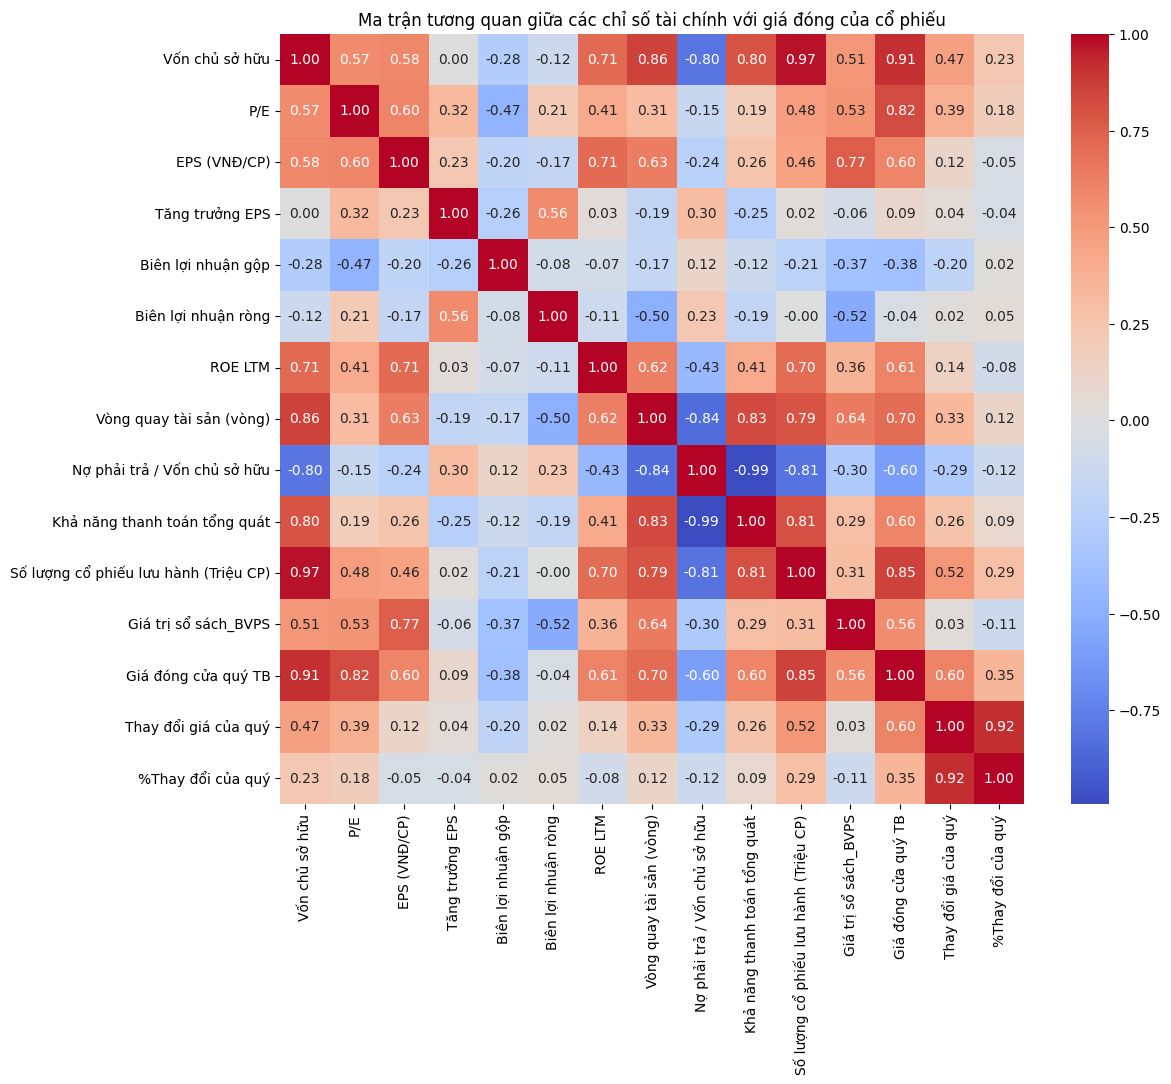

In [65]:
# Vẽ heatmap ma trận tương quan
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Ma trận tương quan giữa các chỉ số tài chính với giá đóng của cổ phiếu')
plt.show()

## Dựa trên ma trận tương quan giữa các chỉ số tài chính với GIÁ ĐÓNG CỬA của cổ phiếu, ta có thể nhận xét như sau:

- Vốn chủ sở hữu (0.908779), số lượng cổ phiếu lưu hành (0.853926), P/E (0.822625), Vòng quay tài sản (0.701041) có độ tương quan dương rất mạnh với 'Giá đóng cửa trung bình mỗi quý' của cổ phiếu. Trong đó vốn chủ sở hữu có tương quan dương lớn nhất.

- Chỉ số ROE LTM (0.608152) và thay đổi giá của quý (0.603731) có tương quan mạnh vừa với 'Giá đóng cửa trung bình mỗi quý' của cổ phiếu.

    - ROE là tỉ suất lợi nhuận trên vốn chủ sở hữu, đo lường mức độ hiệu quả của doanh nghiệp trong việc tạo ra lợi nhuận từ vốn chủ sở hữu vì vậy sẽ có ảnh hưởng đối với giá đóng cửa, ở FPT ROE có ảnh hưởng tương đối mạnh

- Chỉ số EPS (0.597805), khả năng thanh toán tổng quát (0.597279), giá trị sổ sách (0.560065) và %Thay đổi của quý (0.354048) có độ tương quan dương trung bình với 'Giá đóng cửa trung bình mỗi quý' của cổ phiếu.
    - Khả năng thanh toán tổng quát có tương quan dương trung bình cho thấy công ty có thể đã có tận dụng đòn bẩy tài chính để tăng trưởng nhưng ở mức trung bình.

- Tăng trưởng EPS (0.090649) có độ tương quan dương rất yếu với 'Giá đóng cửa trung bình mỗi quý'.
    - Tăng trưởng EPS cao đi kèm với đầu tư mạo hiểm có thể làm tăng rủi ro tài chính và có thể không làm tăng giá đóng cửa.


- Biên lợi nhuận ròng (-0.036111) có mức tương quan âm rất yếu với 'Giá đóng cửa trung bình mỗi quý' của cổ phiếu.

- Biên lợi nhuận gộp (-0.3785) và nợ phải trả / vốn chủ sở hữu (-0.595096) có mức tương quan âm trung bình với 'Giá đóng cửa trung bình mỗi quý' của cổ phiếu.
    - Nợ phải trả / vốn chủ sở hữu hay (D/E) phản ánh mức độ đòn bẩy tài chính, nếu D/E cao thì rủi ro tài chính cao hơn và ngược lại. Đối với FPT D/E dao động không lớn qua các quý trong năm, vì vậy độ biến thiên của D/E là khá nhỏ để tạo ra tương quan rõ ràng.
    - Biên lợi nhuận gộp chỉ đo lường lợi nhuận sau khi trừ chi phí sản xuất, nhưng không tính đến các chi phí khác nên nếu công ty có biên lợi nhuận gộp cao nhưng chi phí hoạt động lớn thì vẫn có thể có lợi nhuận ròng thấp từ đó không tác động mạnh đến việc tăng giá đóng cửa.


=>  Như vậy, có thể kết luận, Giá đóng cửa tính trung bình trên mỗi quý (giá cổ phiếu) phụ thuộc mạnh nhất vào Vốn chủ sở hữu, Số lượng tài sản lưu hành và P/E
